> # ***Cost and Profit Analysis: Food Delivery Platform***

> ## **1. Introduction and Context**
1. The food delivery platform needed a `clear understanding of its cost and profit components` to optimize operations.

#### **1.1 Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

#### **1.2 Import and read data**

In [2]:
# Read data

orders = pd.read_csv("food_orders_new_delhi.csv")
display(orders)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


#### **1.3 Data Dictionary**

1. `Order ID`: Unique identifier for each order.  
2. `Customer ID`: Unique identifier for the customer placing the order.  
3. `Restaurant ID`: Unique identifier for the restaurant fulfilling the order.  
4. `Order Date and Time`: Date and time when the order was placed.
5. `Delivery Date and Time`: Date and time when the order was delivered to the customer.
6. `Order Value`: Total value of the food items in the order (before fees and discounts).
7. `Delivery Fee`: Fee charged for delivering the order (Delivery Fee is cost head for platform).
8. `Payment Method`: Mode of payment used by the customer (e.g., Credit Card, Digital Wallet, Cash on Delivery). 
9. `Discounts and Offers`: Discounts or promotional offers applied to the order. 
10. `Commission Fee`: Fee charged by the platform for facilitating the order (percentage or flat). 
11. `Payment Processing Fee`: Fee charged by the payment gateway for processing payments (Cost to the platform).
12. `Refunds/Chargebacks`: Amount refunded to the customer or charged back due to disputes or cancellations (Cost or Surplus to the platform).

---
> **Note:** ***`The data being analyzed belongs to a Food Delivery Platform, not a restaurant.`***
---

#### **1.4. `Note:` Relationship Between Variables**

- `Revenue` = `Commission Fee`  
- `Cost` = `Delivery Fee`, `Discounts and Offers`, and `Payment Processing Fees`  
- `Refunds/Chargebacks` will be added to cost:
  - If its refund to customer, then it will add to platform's cost. (All the values in this case are positive, meaning a refund.)
  - If it's chargeback (-ve value), then it will be reduced from the cost.

> ## **2. Data Exploration and Cleaning**

#### **2.1 Data Inspection**

In [3]:
# Check shape of teh data

orders.shape

(1000, 12)

In [4]:
# Check metadata

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


> #### **Key Insights:**
1. Dataset have 1000 rows and 12 columns.
2. `Order Date and Time`: Data type should be datetime.  

> ## **Primary Analysis Plan:**
1. `Clean the Dataset`:     
   1. Change datatypes of Datetime variables
   2. Check and handle missing values 
2. `Create New Features`:
   1. Discount percentage from Discount and Offers
   2. Discount Amount 
   3. Cost per transaction 
   4. Revenue per transaction
3. `Analyse Cost`:
   1. Fixed cost
   2. variable cost
4. `Revenue and Profit Assessment`;
   1. Calculate Revenue
   2. Calculate Profit
5. `Identify Trends`
6. `Recommendations`

#### **2.2 Data Types**

In [5]:
# Change datatypes of Datetime variables

orders['Order Date and Time'] = pd.to_datetime(orders['Order Date and Time'], errors= 'coerce')
orders['Delivery Date and Time'] = pd.to_datetime(orders['Delivery Date and Time'], errors= 'coerce')

orders[['Order Date and Time', 'Delivery Date and Time']].dtypes

Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
dtype: object

#### **2.3 Missing Values**

In [6]:
# Check for null values

orders.isna().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

**`Note:`** It is acceptable for Discounts and Offers to contain null values.

> ## **3. Feature Engineering**
- Discount Calculation
- Cost
- Revenue
- Net Income
- Date

#### **3.1 Discount Calculation**

In [7]:
# Discount Amount

orders['Discounts and Offers'].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

> **`Analysis Plan:`**  
1. Write a function that separates percentage and fixed amount off  
2. Calculate the discount amount by multiplying the extracted discount percentage by the order value.  

In [8]:
# Create a function that separates percentage and fixed amount
# We will identify the percentage by values that are less than or equal to 1
# Fixed values are larger than 1

def extract_discount(discounts):
    if isinstance(discounts, str):
        if 'off' in discounts:
            return float(discounts.split(" ")[0])
        elif "%" in discounts:
            return float(discounts.split("%")[0])/100
        else:
            return 0.0
    else:
        return 0.0

In [9]:
# Apply the function 

orders['Disc Pct'] = orders['Discounts and Offers'].apply(lambda x: extract_discount(x))
orders['Disc Pct']

0       0.05
1       0.10
2       0.15
3       0.00
4      50.00
       ...  
995     0.05
996     0.00
997     0.00
998     0.15
999     0.15
Name: Disc Pct, Length: 1000, dtype: float64

In [10]:
# Discount Amount

orders['Discount Amount']= orders.apply(lambda x: x['Order Value'] * x['Disc Pct'] if x['Disc Pct'] <= 1 else x['Disc Pct'], axis=1)
orders['Discount Amount']

0       95.70
1       98.60
2      140.55
3        0.00
4       50.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Name: Discount Amount, Length: 1000, dtype: float64

#### **3.2 Cost Calculation**

In [11]:
# Cost
orders['Cost'] = orders['Delivery Fee'] + orders['Discount Amount'] + orders['Payment Processing Fee']

In [12]:
# Refunds and Chargebacks
orders['Refunds/Chargebacks'].value_counts()

Refunds/Chargebacks
0      715
100    105
50      92
150     88
Name: count, dtype: int64

**`Note:`** All values in the `Refunds/Chargebacks` column are positive, representing expenses incurred in the form of refunds. Hence, we will include it as part of the total cost.

In [13]:
# Updated Cost

orders['Cost'] = orders['Delivery Fee'] + orders['Discount Amount'] + orders['Payment Processing Fee'] + orders['Refunds/Chargebacks']

#### **3.4 Revenue and Net Income Calculation**

In [14]:
# Revenue
orders['Revenue'] = orders['Commission Fee']

# Net Income
orders['Net Income'] = orders['Revenue'] - orders['Cost']

#### **3.5. Order Date**

In [15]:
# Seaparate Date from Order date and time column

orders['Date'] = orders['Order Date and Time'].dt.date

In [ ]:
# Check the data

orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Disc Pct,Discount Amount,Cost,Revenue,Net Income,Date
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70,142.70,150,7.30,2024-02-01
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10,98.60,161.60,198,36.40,2024-02-02
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55,215.55,195,-20.55,2024-01-31
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00,0.00,77.00,146,69.00,2024-01-16
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.00,50.00,130.00,130,0.00,2024-01-29


> ## **4. Exploratory Data Analysis**

#### **4.1 Summary Statistics: Numeric Variables** 

In [17]:
# Summary Statistics: Numerical Variables

orders[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', 'Discount Amount', 'Cost', 'Revenue', 'Net Income']].describe()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount,Cost,Revenue,Net Income
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1053.969000,28.620000,126.99000,29.832000,28.300000,74.289850,161.041850,126.99000,-34.051850
std,530.975339,16.958278,43.06405,11.627165,49.614228,68.688494,85.747907,43.06405,97.650589
min,104.000000,0.000000,50.00000,10.000000,0.000000,0.000000,16.000000,50.00000,-389.250000
25%,597.750000,20.000000,90.00000,20.000000,0.000000,26.837500,94.975000,90.00000,-92.837500
50%,1038.500000,30.000000,127.00000,30.000000,0.000000,50.000000,141.000000,127.00000,-21.125000
75%,1494.000000,40.000000,164.00000,40.000000,50.000000,101.100000,215.125000,164.00000,37.175000
max,1995.000000,50.000000,200.00000,50.000000,150.000000,299.250000,472.600000,200.00000,176.000000


#### **4.2 Summary Statistics: Object Variables** 

In [ ]:
# Summary Statistics: Object Variables

orders[['Discounts and Offers','Payment Method']].describe()

,Discounts and Offers,Payment Method
count,815,1000
unique,4,3
top,10%,Cash on Delivery
freq,233,357


#### **4.3 Temporal Analysis**

In [19]:
# Temporal variables

start_date= orders['Date'].min()
end_date= orders['Date'].max()

print(f"The dataset spans from {start_date} to {end_date}, a total {(end_date - start_date).days} days.")

The dataset spans from 2024-01-01 to 2024-02-07, a total 37 days.


> #### **`Key Insights`**

1. `Data Overview`  
   - The dataset spans from 1st January 2024 to 7th February 2024.  

2. `Average Order Value`  
   - Average: 1053.97, with high variability in order sizes.  

3. `Delivery Fee`  
   - Some orders have no delivery fee borne by the platform (paid by customers or restaurants).  
   - Average delivery fee: 28.62, with a maximum of 50.  

4. `Commission Fee`  
   - A lower standard deviation (43.06) indicates consistent commission charges.  
   - Range: 50–200, with an average of 126.99.  

5. `Payment Processing Fee`  
   - Average: 29.83, with a maximum of 50.  

6. `Refunds and Chargebacks`  
   - Average: 28.30, with occasional large refunds (max: 150).  

7. `Discounts`  
   - Average discount: 74.29, indicating significant platform investment in offers.  
   - Discounts applied in 815 orders, with "10%" being the most frequent (233 instances).  

8. `Cost`  
   - Average cost per order: 161.04, with a maximum of 472.60.  
   - Minimum cost: 16, possibly due to low/no delivery fees, discounts, or refunds.  

9. `Revenue`  
   - Average revenue: 126.99, aligning with the mean commission fee.  

10. `Payment Methods`  
   - Most popular method: "Cash on Delivery" (357 orders).  

#### **4.4 Distribution**

##### **1. Cost Breakdown**

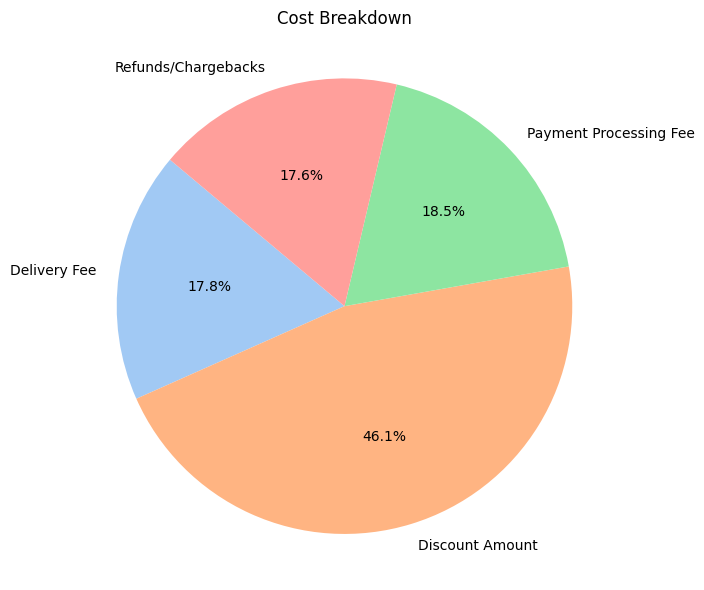

Delivery Fee              28620.00
Discount Amount           74289.85
Payment Processing Fee    29832.00
Refunds/Chargebacks       28300.00
dtype: float64

In [20]:


cost_data = orders[['Delivery Fee', 'Discount Amount', 'Payment Processing Fee', 'Refunds/Chargebacks']]
cost_sum= cost_data.sum()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(cost_sum, labels=cost_sum.index, autopct= '%1.1f%%',startangle=140, colors=sns.color_palette('pastel') )
plt.title('Cost Breakdown')

plt.axis('equal')
plt.tight_layout()
plt.show()

display(cost_sum)

##### **2. Cost Distribution**

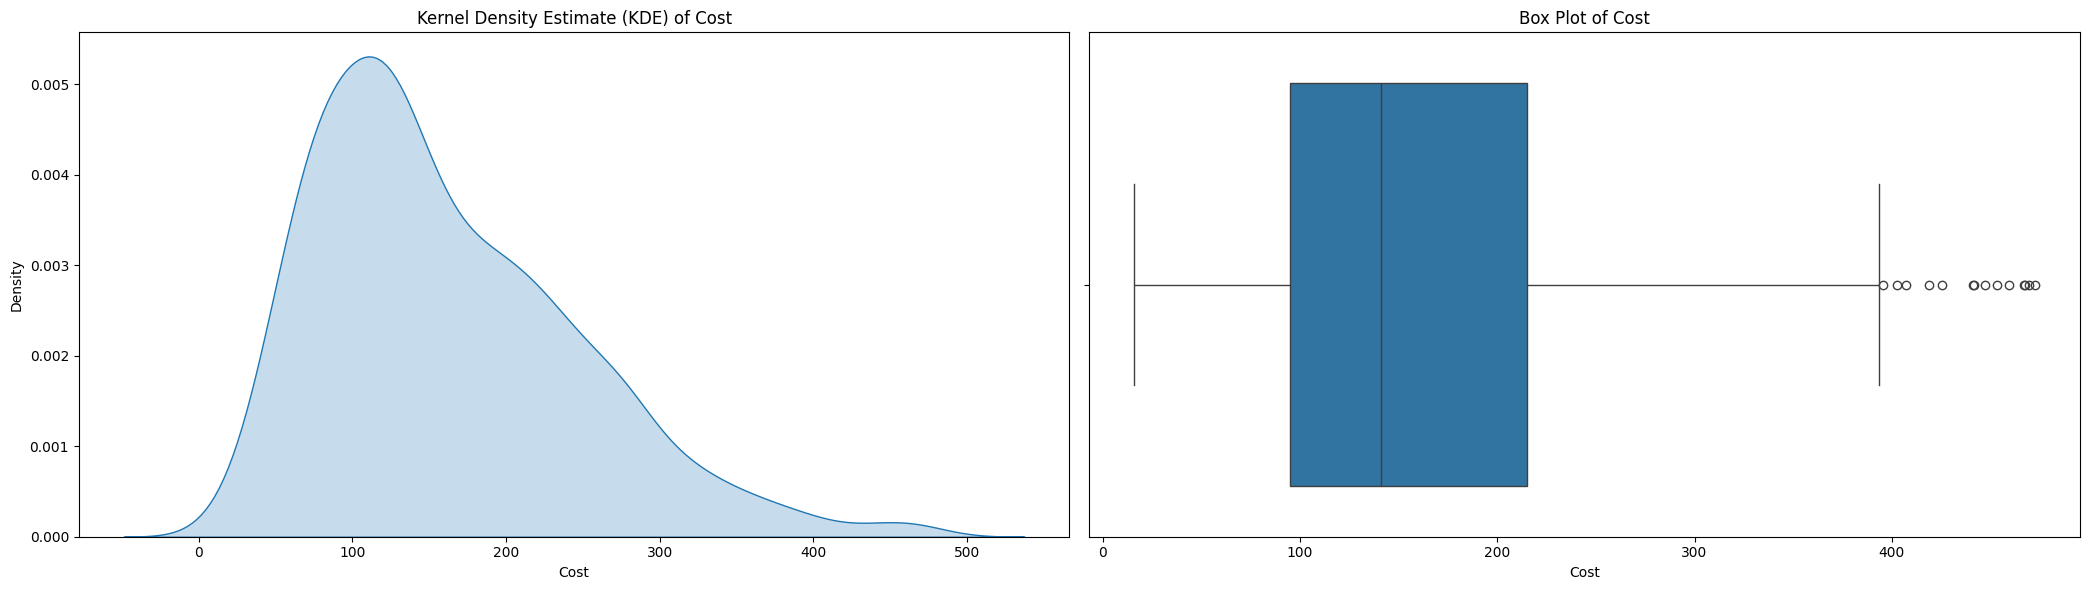

In [21]:
# Cost 

plt.figure(figsize=(21, 6))

# Kde plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=orders, x='Cost', fill=True)
plt.title('Kernel Density Estimate (KDE) of Cost')
plt.xlabel('Cost')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=orders, x='Cost')
plt.title('Box Plot of Cost')
plt.xlabel('Cost')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

##### **3. Revenue Distribution**

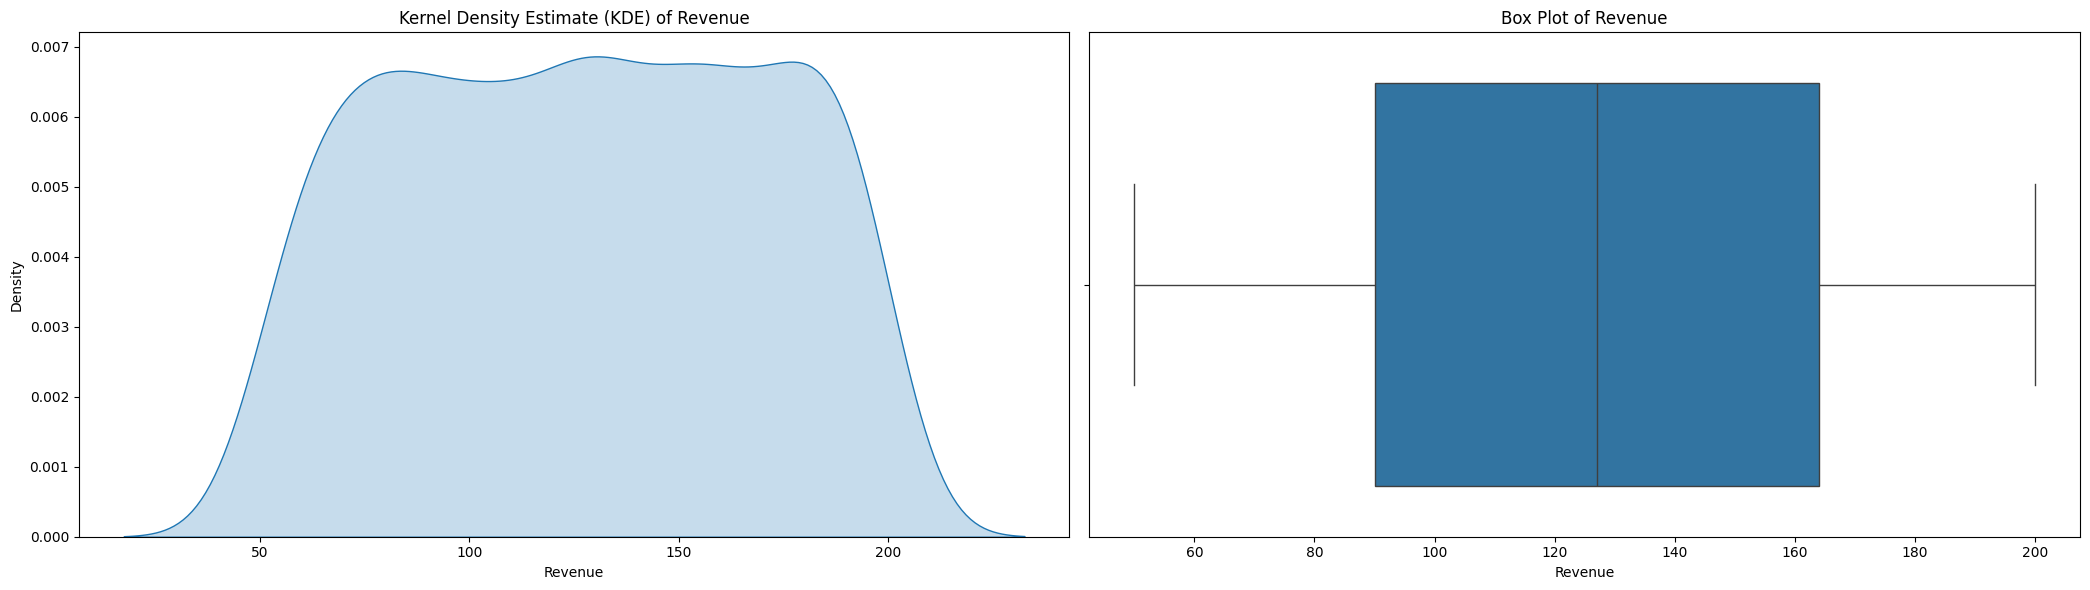

In [22]:
# Revenue

plt.figure(figsize=(21, 6))

# Kde plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=orders, x='Revenue', fill=True)
plt.title('Kernel Density Estimate (KDE) of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=orders, x='Revenue')
plt.title('Box Plot of Revenue')
plt.xlabel('Revenue')

plt.tight_layout()
plt.show()


##### **4. Net Income Distribution**

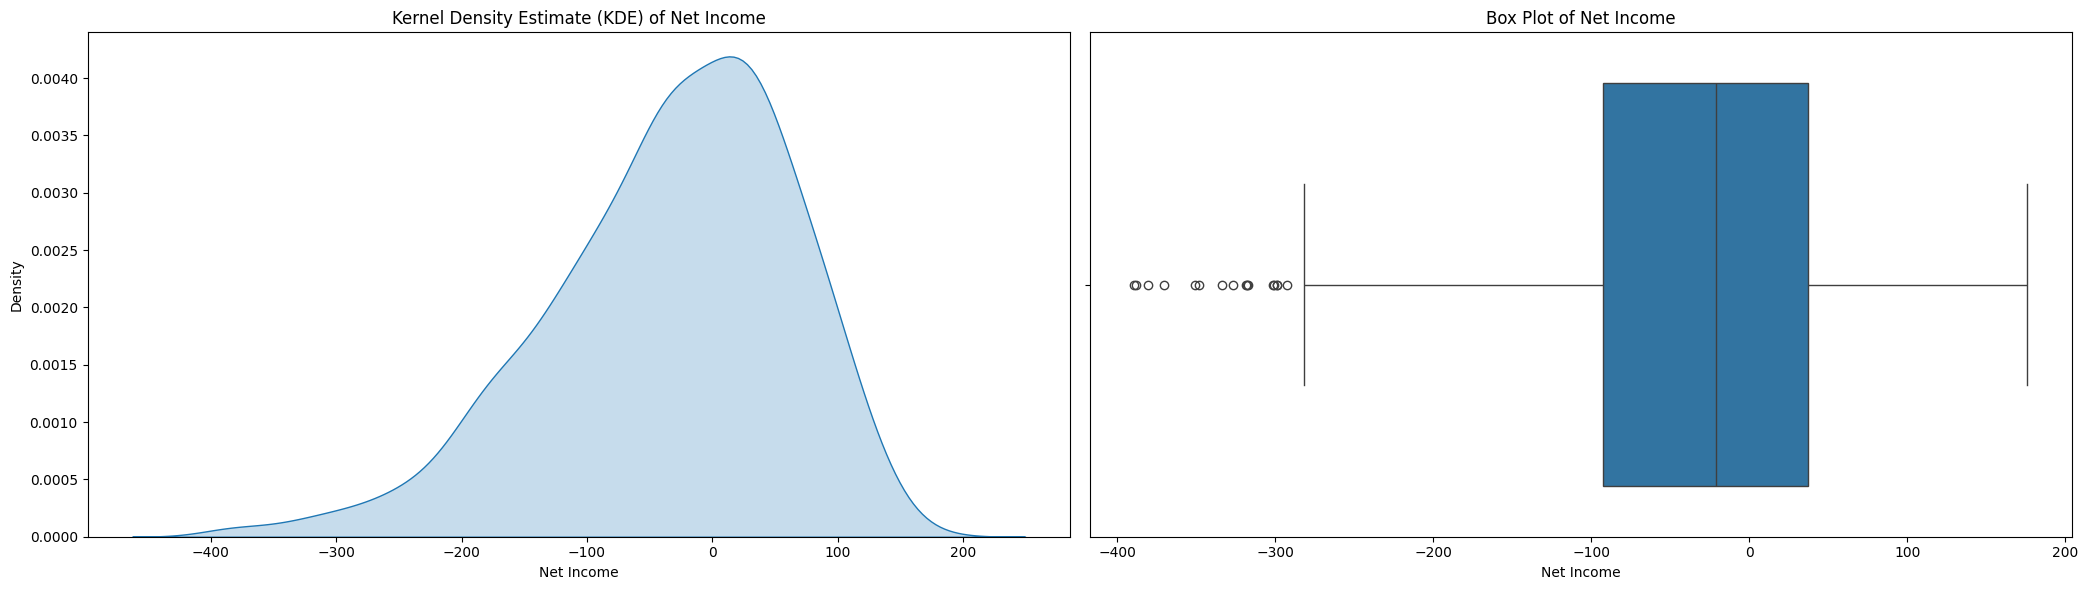

In [23]:
# Net Income

plt.figure(figsize=(21, 6))

# Kde plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=orders, x='Net Income', fill=True)
plt.title('Kernel Density Estimate (KDE) of Net Income')
plt.xlabel('Net Income')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=orders, x='Net Income')
plt.title('Box Plot of Net Income')
plt.xlabel('Net Income')

plt.tight_layout()
plt.show()

##### **5. Comparision: Cost, Revenue, and Net Income Distributions**

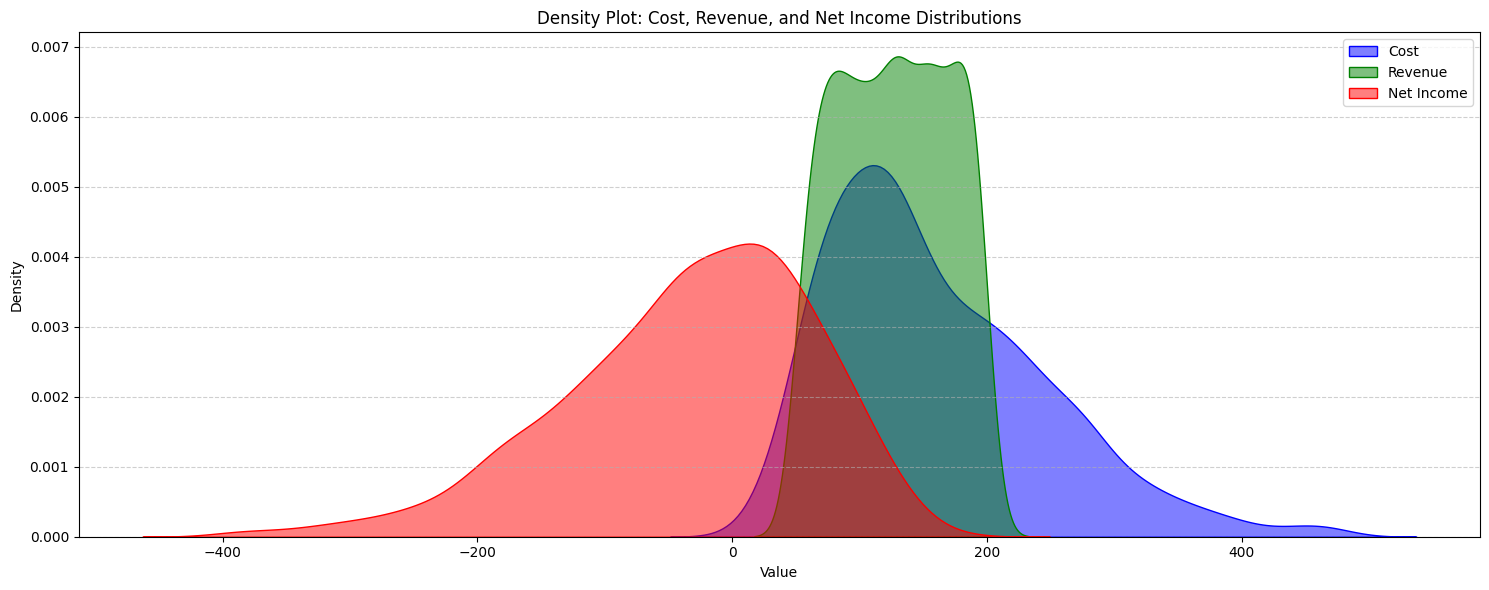

In [24]:
plt.figure(figsize=(15, 6))

# Plot: Density plot for each variable
sns.kdeplot(orders['Cost'], fill=True, label='Cost', alpha=0.5, color='blue')
sns.kdeplot(orders['Revenue'], fill=True, label='Revenue', alpha=0.5, color='green')
sns.kdeplot(orders['Net Income'], fill=True, label='Net Income', alpha=0.5, color='red')

plt.title('Density Plot: Cost, Revenue, and Net Income Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

##### **6. Payment Methods and Payment Processing Fee**

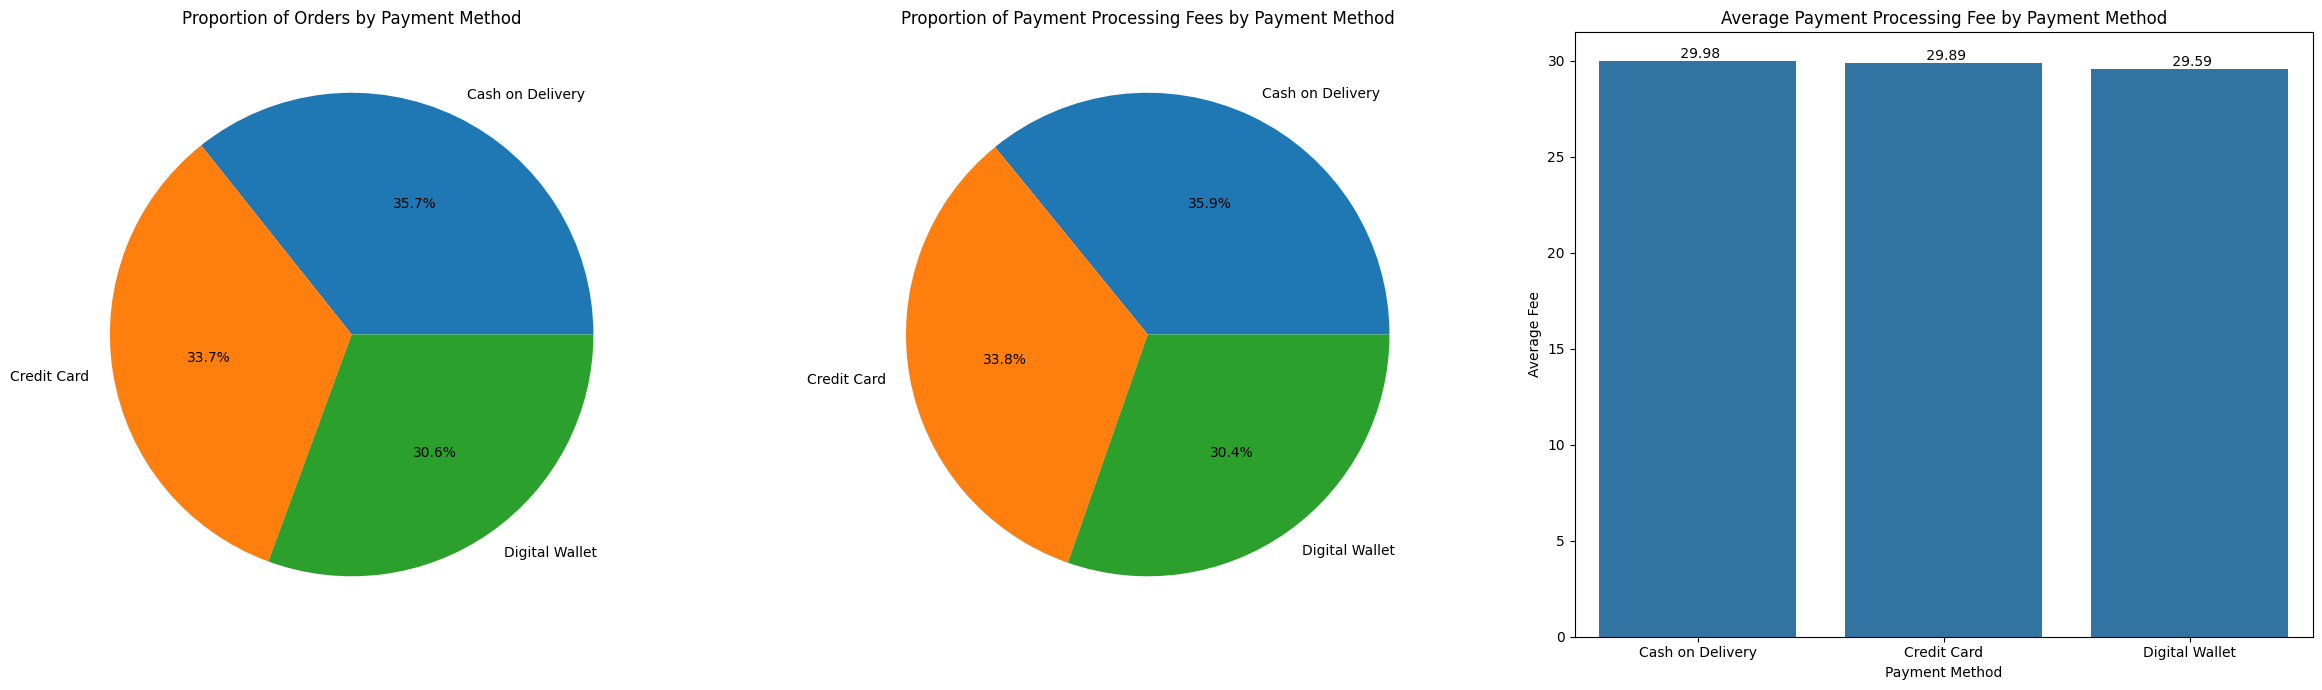

In [25]:
# Plot: Payment Methods and Payment Processing Fee
payment_summary = orders.groupby('Payment Method').agg(Portion=('Payment Method', 'count'), 
                                                       Total_Fee=('Payment Processing Fee', 'sum'), 
                                                       Avg_Fee=('Payment Processing Fee', 'mean')).reset_index()
# Plot: Pie chart
plt.figure(figsize=(24, 7))

# 1. Payment Method
plt.subplot(1, 3, 1)
plt.pie(payment_summary['Portion'], labels=payment_summary['Payment Method'], autopct='%1.1f%%')
plt.title('Proportion of Orders by Payment Method')

# 2. Payment Processing Fees by Payment Method
plt.subplot(1, 3, 2)
plt.pie(payment_summary['Total_Fee'], labels=payment_summary['Payment Method'], autopct='%1.1f%%')
plt.title('Proportion of Payment Processing Fees by Payment Method')

# 3. Average Payment Processing Fees by Payment Method
plt.subplot(1, 3, 3)
b= sns.barplot(data= payment_summary, x= 'Payment Method', y= 'Avg_Fee')
for i, j in enumerate(payment_summary['Avg_Fee']):
    b.text(i, j, f"{j: .2f}", va='bottom', ha= 'center')

plt.title('Average Payment Processing Fee by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Fee')


plt.tight_layout()
plt.show()


> #### **`Key Insights`**

1. `Discount-Heavy Cost Structure`: The large portion of costs attributed to discounts (46.13%) is draining profitability. A review of discount strategies could help reduce this impact.
2. `Revenue Shortfall`: Revenue per order is consistently lower than costs, highlighting a need to either increase prices or reduce operational costs to reach profitability.
3. `High Cost Variability`: The wide cost range and high standard deviation suggest some costs could be optimized, especially those contributing to higher-than-average expenses.
4. `Losses Across the Board`: The business is largely operating at a loss, with the majority of orders showing negative net income. Cost-cutting measures and pricing strategies should be prioritized to address the imbalance.

##### **7. Correlation**

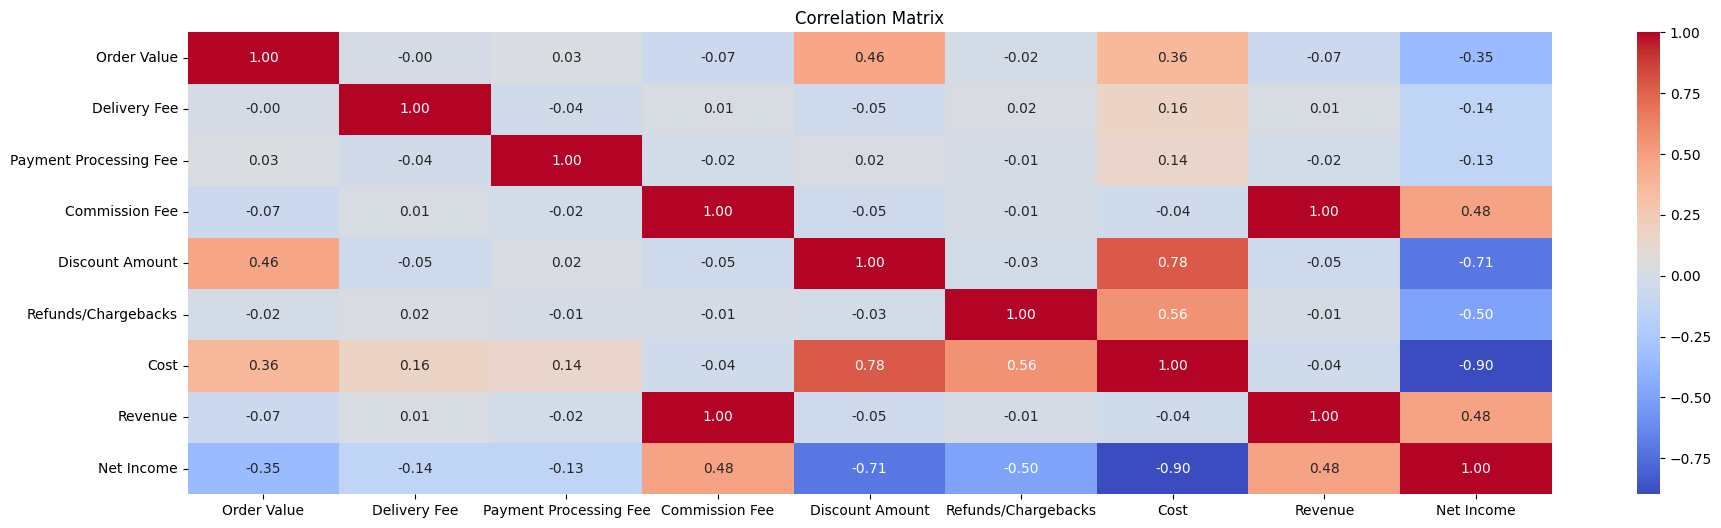

In [26]:
numeric_orders= orders[['Order Value', 'Delivery Fee', 'Payment Processing Fee', 'Commission Fee', 'Discount Amount',"Refunds/Chargebacks", 'Cost', 'Revenue', 'Net Income']]
correlation_matrix = numeric_orders.corr()

# Correlation plot
plt.figure(figsize=(22, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


#### **`Key Insights`:**

**1. Strong Impact of Cost on Net Income (-0.90 correlation):**
- Costs have a dominant negative impact on profitability. 
- Reducing costs should be the top priority.  
  **Focus Areas for Cost Reduction:**  
  - **Discount Amount** (-0.71 correlation with Net Income, +0.78 correlation with Cost):  
    Discounts significantly drive up costs and reduce profitability.  
  - **Refunds/Chargebacks** (-0.50 correlation with Net Income, +0.56 correlation with Cost):  
    High refund rates escalate costs substantially.  
  - **Delivery Fee** (-0.14 correlation with Net Income, +0.16 correlation with Cost):  
    Delivery fee subsidies marginally increase overall costs.

**2. Positive Impact of Revenue on Net Income (+0.48 correlation):**  
- Revenue is positively correlated with profitability, emphasizing the need to focus on revenue growth to improve Net Income.  

#### **`Focus Areas for Revenue Growth:`**
- **Commission Fee** (+0.48 correlation with Net Income):  
  - Increasing commission fees is the **most impactful way** to enhance revenue.  
- **Order Value** (+0.46 correlation with Discount Amount):  
  - Larger orders are associated with higher discounts but also represent an opportunity to increase total revenue.

---

#### **`Actionable Priorities`:**
1. **Reduce Discounts** while maintaining customer satisfaction to control costs.  
2. **Increase Commission Fees** from restaurant partners to maximize revenue potential.  
3. Optimize **Refund and Chargeback Rates** to avoid unnecessary cost escalations.  
4. Focus on driving **larger order values** with minimal discounts for sustainable revenue growth.  

> ## **5. Key Performance Indicators (KPIs)**

##### **5.1 Financial KPIs**
1. Total revenue generated
2. Total cost of operations
3. Total Net Income 
4. The Average Order Value
5. Cost per order
6. Revenue per order
7. Revenue-to-Cost Ratio
8. Revenue-to-Order Value Ratio
9. Net-Income-to-Revenue Ratio
10. Net-Income-to-Cost Ratio
11. Net-Income-to-Order-Value Ratio

In [27]:
# Total Revenue
total_revenue = orders['Revenue'].sum()
print(f"Total revenue generated: {total_revenue}.")

# Total Cost
total_cost = orders['Cost'].sum()
print(f"Total cost of operations: {total_cost: .2f}.")

# Profit or Loss
net_income = orders['Net Income'].sum()
if net_income < 0:
    print(f"Incurred a loss of {abs(net_income): .2f}.") 
elif net_income > 0:
    print(f"Earned a profit of {net_income: .2f}.")
else:
    print("The platform has broken even with no profit or loss.")

# Average Order Value
aov= orders['Order Value'].sum()/len(orders)
print(f"The Average Order Value: {aov: .2f}.")

# Cost per order
cost_per_order = total_cost/len(orders)
print(f"Cost per order: {cost_per_order: .2f}.")

# Revenue per order
rev_per_order= total_revenue/len(orders)
print(f"Revenue per order: {rev_per_order: .2f}.")

# Ratio: Revnue to Cost
rev_to_cost_ratio = total_revenue / total_cost
print(f"Revenue-to-Cost Ratio: {rev_to_cost_ratio:.2f}")

# Ration: Revenue to Order Value
rev_to_order_value_ratio = total_revenue / orders['Order Value'].sum()
print(f"Revenue-to-Order Value Ratio: {rev_to_order_value_ratio:.2f}")

# Ratio: Net Income to Revenue
net_income_to_revenue_ratio = net_income / total_revenue
print(f"Net-Income-to-Revenue Ratio: {net_income_to_revenue_ratio:.2f}")

# Net Income to Cost
net_income_to_cost_ratio = net_income / total_cost
print(f"Net-Income-to-Cost Ratio: {net_income_to_cost_ratio:.2f}")

# Net Income to Order Value
net_income_to_order_value_ratio = net_income / orders['Order Value'].sum()
print(f"Net-Income-to-Order-Value Ratio: {net_income_to_order_value_ratio:.2f}")

Total revenue generated: 126990.
Total cost of operations:  161041.85.
Incurred a loss of  34051.85.
The Average Order Value:  1053.97.
Cost per order:  161.04.
Revenue per order:  126.99.
Revenue-to-Cost Ratio: 0.79
Revenue-to-Order Value Ratio: 0.12
Net-Income-to-Revenue Ratio: -0.27
Net-Income-to-Cost Ratio: -0.21
Net-Income-to-Order-Value Ratio: -0.03


##### **5.1 Plot: Financials**

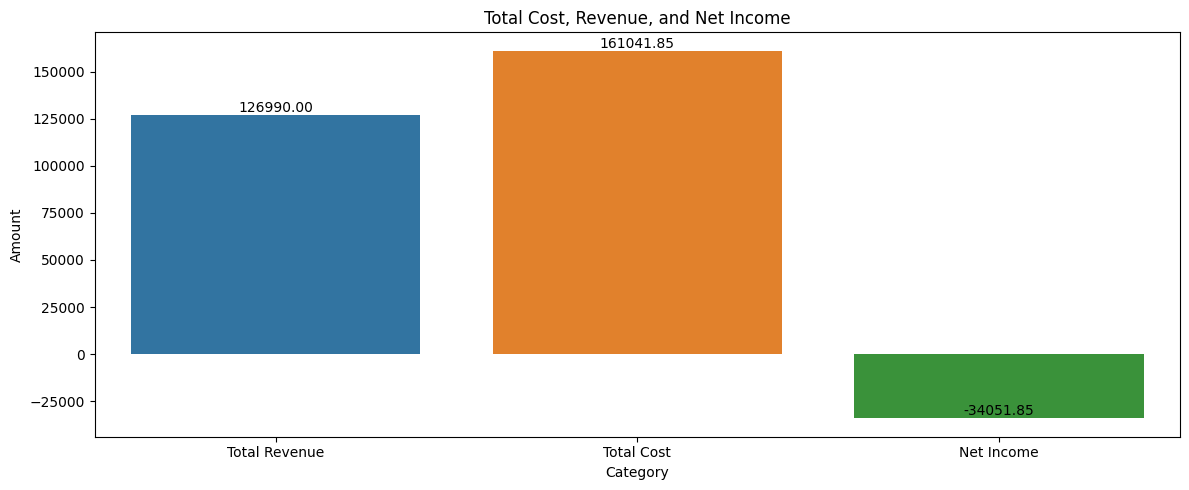

In [28]:
# # Plot: Total Cost, Revenue and Net Income 

pnl_values = pd.DataFrame({'categories': ['Total Revenue', 'Total Cost', 'Net Income'],
                           'values': [total_revenue, total_cost, net_income]})

plt.figure(figsize=(12, 5))
a= sns.barplot(data= pnl_values, x='categories', y= 'values', hue= 'categories')

for i, j in enumerate(pnl_values['values']):
    a.text(i, j, f"{j:.2f}", va= 'bottom', ha= 'center')


plt.title('Total Cost, Revenue, and Net Income')
plt.xlabel('Category')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

##### **5.2 Operational KPIs**
1. Orders with Delivery Fee paid by the customer
2. Delivery Fee paid Platform
3. Refund Rate

In [29]:
# Delivery Fee Contribution by Customers
# When delivery cost is zero, the cost to the platform is zero, and the customer has paid it. 
delfee_contribution =  (len(orders[orders['Delivery Fee']== 0])/len(orders)) * 100
print(f"Orders with Delivery Fee paid by the customers: {delfee_contribution: .2f}%.")

# Deluvery fee as cost to platform
delfree_platform_contri = 100 - delfee_contribution
print(f"Delivery Fee paid Platform: {delfree_platform_contri: .2f}%.")

# Refund and Chargeback Rate: Percentage of orders resulting in refunds or chargebacks.
refund_rate = len(orders[orders['Refunds/Chargebacks'] != 0])/ len(orders) * 100
print(f"Refund Rate: {refund_rate: .2f}%")

Orders with Delivery Fee paid by the customers:  18.60%.
Delivery Fee paid Platform:  81.40%.
Refund Rate:  28.50%


##### **5.3 Marketing KPIs**
1. Total discount offered
2. Discount per Order
3. Discount to Cost Ratio

In [30]:
# Total Discount
total_discount = orders['Discount Amount'].sum()
print(f"Total discount offered: {total_discount: .2f}")

# Discount per order
discount_per_order= orders['Discount Amount'].mean()
print(f"Discount per Order: {discount_per_order: .2f}")

# Discount to Cost ratio
disc_to_cost_ratio= (total_discount/total_cost)*100
print(f"Discount to Cost Ratio: {disc_to_cost_ratio: .2f}%")


Total discount offered:  74289.85
Discount per Order:  74.29
Discount to Cost Ratio:  46.13%


##### **5.4 Paymet Method KPIs**
1. Top Paymet Method 

In [31]:
# Top Paymet Method 

payment_method_dist = orders['Payment Method'].value_counts(normalize=True) * 100
most_used_method= payment_method_dist.idxmax()
print(f"Most used Payment Method: '{most_used_method}' ({payment_method_dist[most_used_method]:.2f}%)")

Most used Payment Method: 'Cash on Delivery' (35.70%)


#### **`Interpretation of KPIs:`**

1. **`Financial Performance:`**
   1. `Revenue-to-Cost Ratio (0.79):` For every dollar spent on operations, the platform earns $0.79 in revenue, inefficiency in cost management.
   2. `Net-Income-to-Revenue Ratio (-0.27):` A negative net-income-to-revenue ratio, with 27% of revenue being insufficient to cover costs.
   3. `Net-Income-to-Cost Ratio (-0.21):` The loss of $0.21 for every dollar spent reflects a structural imbalance in operational efficiency.
   4. `Revenue-to-Order Value Ratio (0.12):` Revenue accounts for only 12% of the average order value.
   
2. **`Operational Efficiency and Customer Behavior:`**
   1. `Cost per Order ($161.04) vs. Revenue per Order ($126.99):` The cost per order exceeds revenue per order by 27%, an unsustainable cost structure.
   2. `Orders with Platform-Paid Delivery Fee (81.40%):` A large proportion of orders have delivery fees subsidized by the platform. 
   3. `Refund Rate (28.50%):` Nearly one in three orders is refunded.
   
3. **`Discount and Payment Method Analysis`**
   1. `Total Discount` offered (74,289.85) and `Discount to Cost Ratio (46.13%):` Discounts make almost half of cost.
   2. `Discount per Order` (74.29): With discounts averaging $74.29 per order, there is significant pressure on margins.
   3. `Most Used Payment Method` - Cash on Delivery (35.70%).
   
4. **`Strategic Considerations for Growth`**
   1. `Revenue-to-Order Value Ratio (0.12):` This low ratio underscores a lack of value capture from transactions.
   2. `Customers covering only 18.60% of delivery fees` reflects an unsustainable burden on the platform.

> ## **6. Deeper Dive into Net Income**

#### **1. Categorization of the Orders by Net Income**

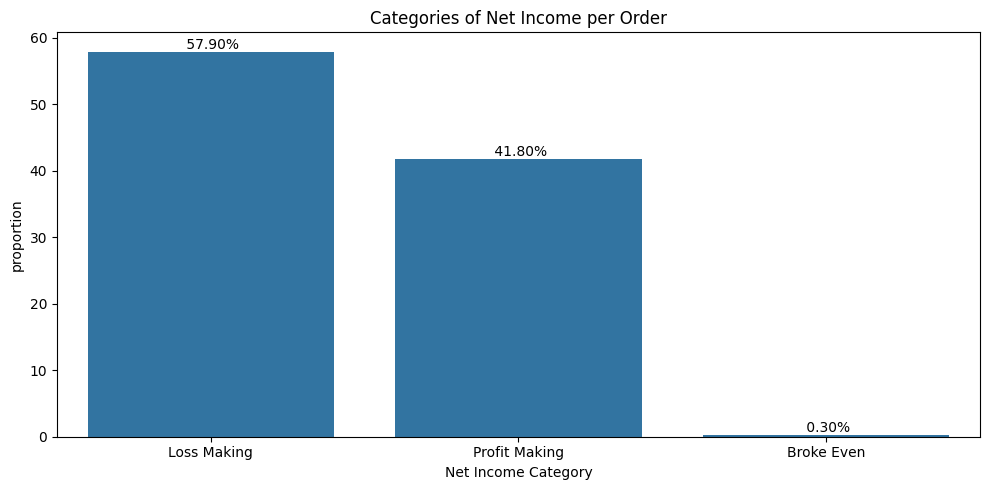

In [32]:
# Flag the orders based on their net income status

orders['Net Income Category'] = orders['Net Income'].apply(lambda x: 'Profit Making' if x>0 else ('Loss Making' if x<0 else 'Broke Even'))
net_income_cat = (orders['Net Income Category'].value_counts(normalize=True) * 100).reset_index()

plt.figure(figsize=(10, 5))
e= sns.barplot(data= net_income_cat, x= 'Net Income Category', y= 'proportion')
plt.title("Categories of Net Income per Order")

for i, j in enumerate(net_income_cat['proportion']):
    e.text(i, j, f"{j: .2f}%", va= 'bottom', ha= 'center')

plt.tight_layout()
plt.show()

#### **2. Net Income Category and mean for each cost and revenue head**

##### **2.1 Mean and Percenatge wrt Order Value**

In [33]:
# Selecting relevant columns for numeric analysis
num_orders = orders[["Order Value", "Commission Fee", "Delivery Fee", "Payment Processing Fee", 
                     "Refunds/Chargebacks", "Discount Amount", "Cost", "Revenue", "Net Income"]]

# Mean values for each column
num_orders_mean = num_orders.mean()

# Percentages with respect to "Order Value"
pct_wrt_order_value = (num_orders_mean / num_orders_mean["Order Value"]) * 100

mean_pct = pd.DataFrame({"Mean": num_orders_mean,
                         "Proportion": pct_wrt_order_value})
mean_pct= mean_pct.reset_index()
mean_pct.columns = ['Variables', 'Mean', 'Proportion']
mean_pct


,Variables,Mean,Proportion
0,Order Value,1053.96900,100.000000
1,Commission Fee,126.99000,12.048741
2,Delivery Fee,28.62000,2.715450
3,Payment Processing Fee,29.83200,2.830444
4,Refunds/Chargebacks,28.30000,2.685088
5,Discount Amount,74.28985,7.048580
6,Cost,161.04185,15.279562
7,Revenue,126.99000,12.048741
8,Net Income,-34.05185,-3.230821


##### **2.2 Net Income Category wise Mean and Percenatge wrt Order Value**

In [34]:
# Group by 'Net Income Category' and calculate mean for each cost head

num_orders_categorized = orders[["Order Value", "Commission Fee", "Delivery Fee", "Payment Processing Fee", 
                     "Refunds/Chargebacks", "Discount Amount", "Cost", "Revenue", "Net Income", "Net Income Category"]]

# Mean
mean_by_category = num_orders_categorized.groupby('Net Income Category').agg('mean').reset_index()

# Percentage of mean values against Order Value

cols_to_calculate = num_orders_categorized.columns.difference(['Net Income Category'])
mean_by_category_pct = mean_by_category[cols_to_calculate].div(mean_by_category['Order Value'], axis= 0) * 100
mean_by_category_pct['Net Income Category'] = mean_by_category['Net Income Category']

# Melt both
mean_by_category_melted = mean_by_category.melt(id_vars= 'Net Income Category',
                                                var_name= 'Cost and Revenue Heads',
                                                value_name= 'Values')
mean_by_category_pct_melted = mean_by_category_pct.melt(id_vars= 'Net Income Category',
                                                        var_name= 'Cost and Revenue Heads',
                                                        value_name= "percentages")
# Merge both
mean_by_category_merged = mean_by_category_melted.merge(mean_by_category_pct_melted, on= ['Net Income Category', 'Cost and Revenue Heads'], how= 'right')
mean_by_category_merged = mean_by_category_merged[~mean_by_category_merged['Cost and Revenue Heads'].isin(["Order Value", "Commission Fee"])]

display(mean_by_category_merged)

,Net Income Category,Cost and Revenue Heads,Values,percentages
3,Broke Even,Cost,111.666667,8.739890
4,Loss Making,Cost,208.567444,18.082068
5,Profit Making,Cost,95.565311,10.449241
6,Broke Even,Delivery Fee,30.000000,2.348030
7,Loss Making,Delivery Fee,30.259067,2.623355
8,Profit Making,Delivery Fee,26.339713,2.880020
9,Broke Even,Discount Amount,50.000000,3.913384
10,Loss Making,Discount Amount,102.298014,8.868880
11,Profit Making,Discount Amount,35.668182,3.900008
12,Broke Even,Net Income,0.000000,0.000000


#### **2. `Plot:` Mean Cost and Revenue heads by Net Income category**

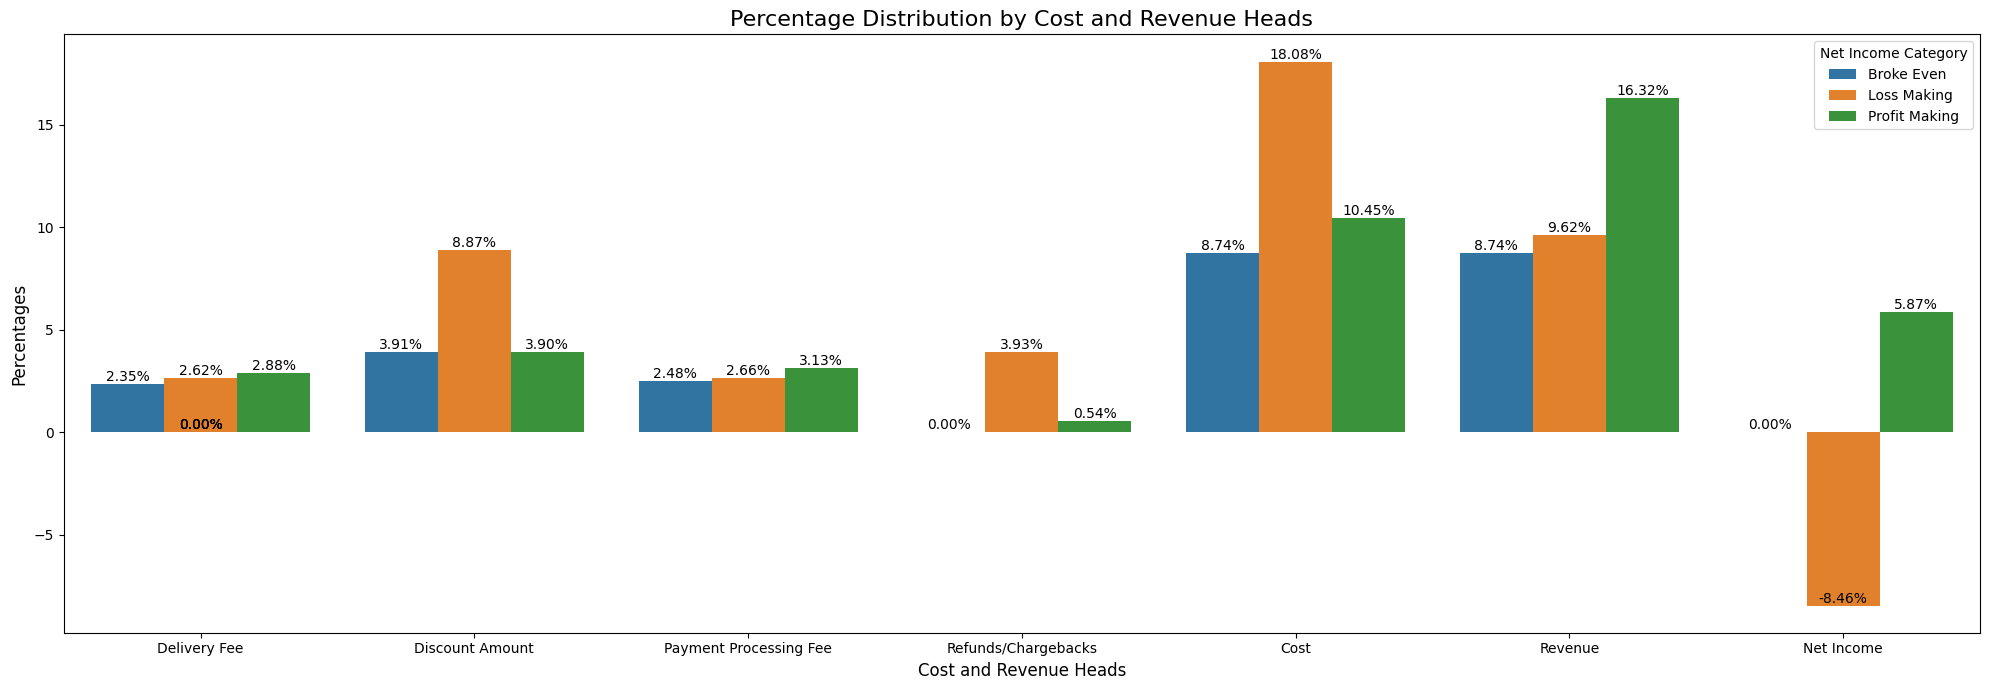

In [35]:
# Order for categories
d_order = ["Delivery Fee", "Discount Amount", "Payment Processing Fee", "Refunds/Chargebacks", "Cost", "Revenue", "Net Income"]

plt.figure(figsize=(20, 7))

# barplot
d = sns.barplot(data=mean_by_category_merged, x='Cost and Revenue Heads', y='percentages', hue='Net Income Category', palette='tab10', order=d_order)

for i in d.patches: 
    height = i.get_height()
    width = i.get_width()
    x = i.get_x() + width / 2
    y = height
    d.annotate(f'{height:.2f}%', xy=(x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Percentage Distribution by Cost and Revenue Heads', fontsize=16)
plt.xlabel('Cost and Revenue Heads', fontsize=12)
plt.ylabel('Percentages', fontsize=12)
plt.legend(title='Net Income Category', fontsize=10)

plt.tight_layout()
plt.show()

> ### **Rationale for Using Profit-Making Means as Thresholds for Cost and Revenue Heads**

- **Data-Driven Approach:**  
  - Thresholds are derived from **profit-making orders**, ensuring they are based on **empirical evidence** within the dataset.  
  - This method mimics success patterns observed in orders that contribute positively to profitability.

- **Proportional Thresholds:**  
  - Thresholds are expressed as a **proportion of order value** because:  
    - **Revenue scales with order value**, making proportional thresholds adaptable to varying order sizes.  
    - Costs also increase with order value, so maintaining proportional limits ensures **scalability** across different transaction levels.

- **Correlation Validation:**  
  - Recommendations prioritize cost and revenue heads with **significant impacts on profitability**, as validated by correlation analysis.

- **Focused Impact:**  
  - This approach helps target areas where adjustments are likely to yield the **highest returns in cost savings and revenue enhancement**.  

#### **3. Threshold of cost and revenue heads:**

In [36]:
# Ideal values from profit making orders

profit_making_pct = mean_by_category_pct[mean_by_category_pct['Net Income Category'] == 'Profit Making']
profit_making_pct_long = profit_making_pct.melt(id_vars= "Net Income Category", var_name= "Cost and Revenue Heads", value_name= "Proportion")
profit_making_pct_long = profit_making_pct_long.drop(columns= 'Net Income Category')
display(profit_making_pct_long)

,Cost and Revenue Heads,Proportion
0,Commission Fee,16.318283
1,Cost,10.449241
2,Delivery Fee,2.880020
3,Discount Amount,3.900008
4,Net Income,5.869041
5,Order Value,100.000000
6,Payment Processing Fee,3.132970
7,Refunds/Chargebacks,0.536244
8,Revenue,16.318283


##### **3.1 Scaling Data Based on Ideal Values**

In [37]:
# Get Order Value from original data
scaled_orders = orders[['Order ID', 'Order Value']].copy()

# Reindexing profit making pct long to access values 
profit_making_pct_long_indexed = profit_making_pct_long.set_index(profit_making_pct_long['Cost and Revenue Heads'])['Proportion']

for i, j in profit_making_pct_long_indexed.items():
    if j != 'Order Value':
        scaled_orders[i] = scaled_orders['Order Value'] * (j/100)

display(scaled_orders)

,Order ID,Order Value,Commission Fee,Cost,Delivery Fee,Discount Amount,Net Income,Payment Processing Fee,Refunds/Chargebacks,Revenue
0,1,1914.0,312.331932,199.998478,55.123585,74.646145,112.333454,59.965047,10.263701,312.331932
1,2,986.0,160.898268,103.029519,28.396998,38.454075,57.868749,30.891085,5.287361,160.898268
2,3,937.0,152.902310,97.909391,26.985788,36.543071,54.992919,29.355930,5.024602,152.902310
3,4,1463.0,238.736477,152.872400,42.134694,57.057111,85.864077,45.835352,7.845243,238.736477
4,5,1992.0,325.060193,208.148886,57.370000,77.688151,116.911306,62.408764,10.681971,325.060193
...,...,...,...,...,...,...,...,...,...,...
995,996,825.0,134.625833,86.206241,23.760166,32.175063,48.419592,25.847003,4.424009,134.625833
996,997,1627.0,265.498461,170.009156,46.857927,63.453123,95.489305,50.973423,8.724682,265.498461
997,998,553.0,90.240104,57.784304,15.926511,21.567042,32.455799,17.325325,2.965427,90.240104
998,999,1414.0,230.740518,147.752272,40.723484,55.146107,82.988247,44.300197,7.582483,230.740518


##### **5.2 Plot: Scaled figures**

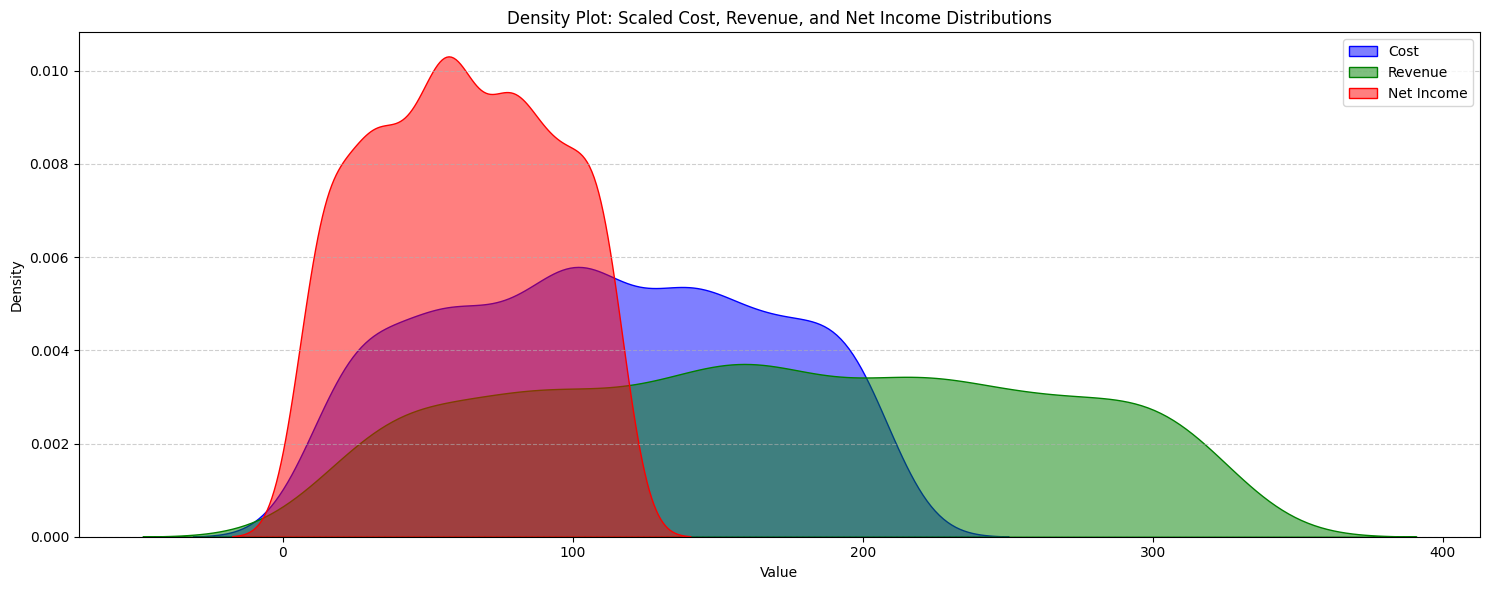

In [38]:
plt.figure(figsize=(15, 6))

# Plot: Density plot
sns.kdeplot(scaled_orders['Cost'], fill=True, label='Cost', alpha=0.5, color='blue')
sns.kdeplot(scaled_orders['Revenue'], fill=True, label='Revenue', alpha=0.5, color='green')
sns.kdeplot(scaled_orders['Net Income'], fill=True, label='Net Income', alpha=0.5, color='red')

plt.title('Density Plot: Scaled Cost, Revenue, and Net Income Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

#### **4. Compare: Original Values Vs Scaled Values**

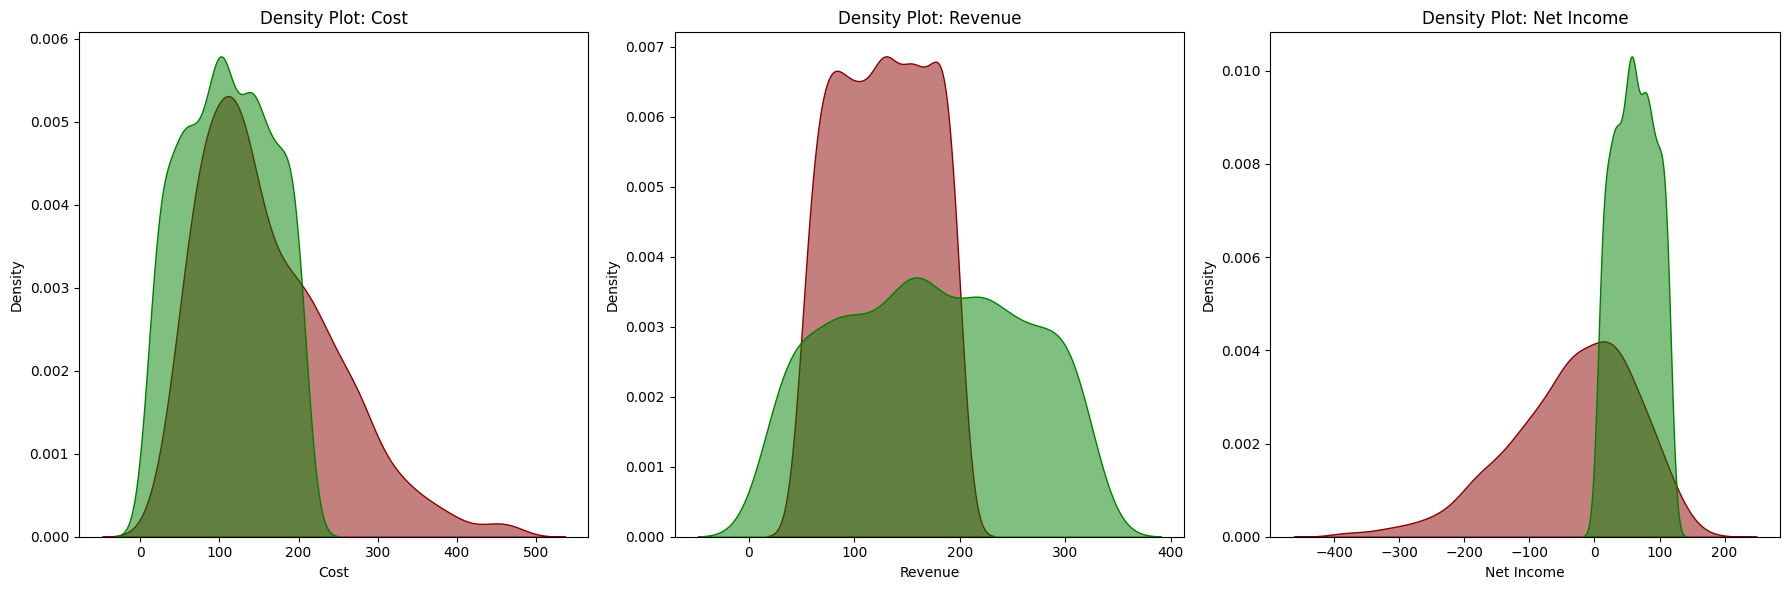

In [39]:
# Variables to compare
variables = ['Cost', 'Revenue', 'Net Income']

plt.figure(figsize=(18, 6))

for i, j in enumerate(variables):
    data= orders[j]
    data_scaled=  scaled_orders[j]
    
    plt.subplot(1, 3, i+1)

    sns.kdeplot(data=orders[j], fill=True, label='Original', alpha=0.5, color='darkred')
    sns.kdeplot(data=scaled_orders[j], fill=True, label='Scaled', alpha=0.5, color='green')

    plt.title(f'Density Plot: {j}')
    plt.xlabel(j)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### **Compare values of Cost and Revenue Heads of Original Data and Scaled Data** 

In [40]:
# Data Preparation

# Sum
orders_sum = orders[["Delivery Fee", "Discount Amount", "Payment Processing Fee", "Refunds/Chargebacks", "Cost", "Revenue", "Net Income"]].sum()
scaled_orders_sum = scaled_orders[["Delivery Fee", "Discount Amount", "Payment Processing Fee", "Refunds/Chargebacks", "Cost", "Revenue", "Net Income"]].sum()

# Mean
orders_mean = orders[["Delivery Fee", "Discount Amount", "Payment Processing Fee", "Refunds/Chargebacks", "Cost", "Revenue", "Net Income"]].mean()
scaled_orders_mean = scaled_orders[["Delivery Fee", "Discount Amount", "Payment Processing Fee", "Refunds/Chargebacks", "Cost", "Revenue", "Net Income"]].mean()

sum_comparision= pd.DataFrame({"orders_sum": orders_sum,
                               "scaled_orders_sum": scaled_orders_sum}).reset_index().rename(columns= {'index': 'Cost Revenue Head'})

mean_comparision= pd.DataFrame({"order_mean": orders_mean, 
                               "scaled_orders_mean": scaled_orders_mean}).reset_index().rename(columns= {'index': 'Cost Revenue Head'})

sum_comparision_melted = sum_comparision.melt(id_vars= "Cost Revenue Head", var_name= "Sum", value_name= "Value")

mean_comparision_melted = mean_comparision.melt(id_vars= 'Cost Revenue Head', var_name= 'Mean', value_name= "Value")

display(sum_comparision)
display(mean_comparision)

,Cost Revenue Head,orders_sum,scaled_orders_sum
0,Delivery Fee,28620.00,30354.518937
1,Discount Amount,74289.85,41104.870953
2,Payment Processing Fee,29832.00,33020.533452
3,Refunds/Chargebacks,28300.00,5651.840492
4,Cost,161041.85,110131.763835
5,Revenue,126990.00,171989.641677
6,Net Income,-34051.85,61857.877842


,Cost Revenue Head,order_mean,scaled_orders_mean
0,Delivery Fee,28.62000,30.354519
1,Discount Amount,74.28985,41.104871
2,Payment Processing Fee,29.83200,33.020533
3,Refunds/Chargebacks,28.30000,5.651840
4,Cost,161.04185,110.131764
5,Revenue,126.99000,171.989642
6,Net Income,-34.05185,61.857878


#### **Plots**

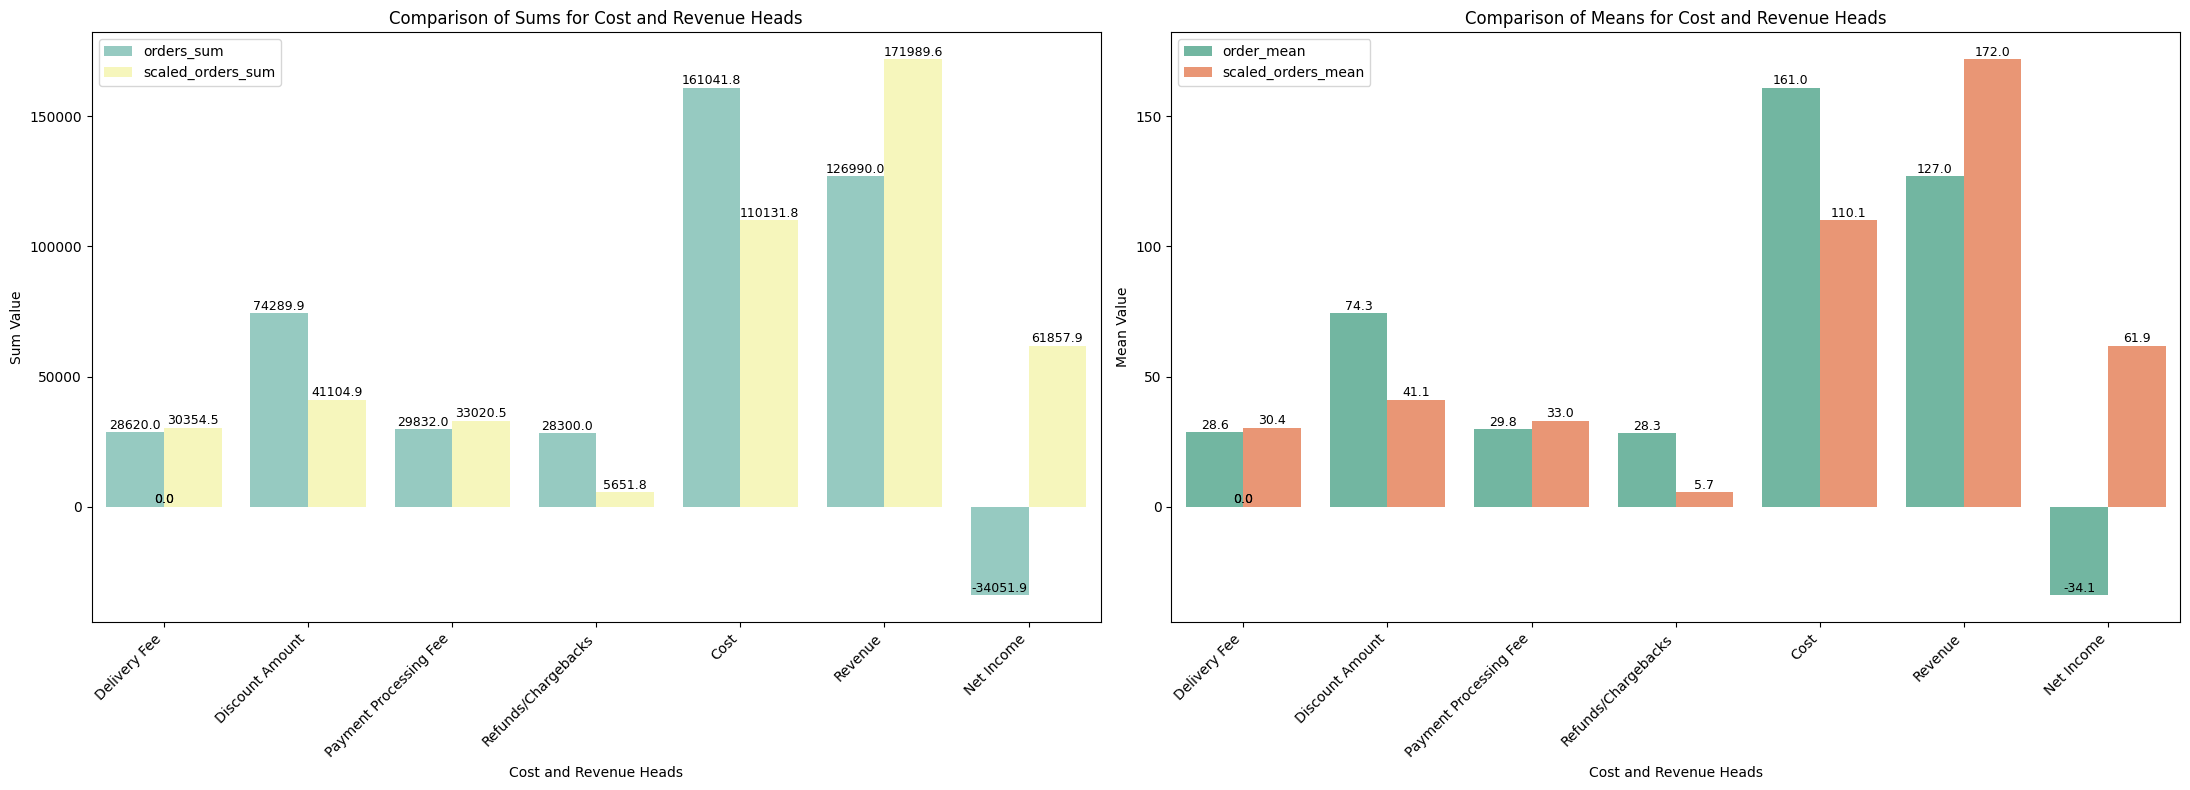

In [41]:
plt.figure(figsize=(22, 8))

# Barplot: Total comparison
plt.subplot(1, 2, 1)
f= sns.barplot(data=sum_comparision_melted, x='Cost Revenue Head', y='Value', hue='Sum', palette="Set3")
plt.title("Comparison of Sums for Cost and Revenue Heads")
plt.xlabel("Cost and Revenue Heads")
plt.ylabel("Sum Value")
plt.xticks(rotation=45, ha= 'right')
plt.legend()

for i in f.patches:
    f.annotate(f"{i.get_height():.1f}", 
                 (i.get_x() + i.get_width() / 2., i.get_height()), 
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Barplot2: Mean comparison
plt.subplot(1, 2, 2)
g= sns.barplot(data=mean_comparision_melted, x='Cost Revenue Head', y='Value', hue='Mean', palette="Set2")
plt.title("Comparison of Means for Cost and Revenue Heads")
plt.xlabel("Cost and Revenue Heads")
plt.ylabel("Mean Value")
plt.xticks(rotation=45, ha= 'right')
plt.legend()

for i in g.patches:
    g.annotate(f"{i.get_height():.1f}", 
                 (i.get_x() + i.get_width() / 2., i.get_height()), 
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), 
                 textcoords='offset points')
    
plt.tight_layout()
plt.show()


> #### **`Note`: Scaled data represents targets or possible change, not current operations.**  
> It provides a perspective on the "what-if" scenarios for real-time data analysis.

> ## **Recommendations**

1. **Address Revenue and Cost Imbalance:**
   - **Logic:** The Revenue-to-Cost Ratio is 0.79, meaning for every ₹1 spent, the platform earns only ₹0.79. 
   - The average cost per order is ₹161.04, while the average revenue per order is ₹126.99. The platform incurred a loss of ₹34,051.85

2. **Reduce Discounts:**
   - **Logic:** High negative correlation between discount amount and net income (-0.71) and a high positive correlation with cost (+0.78).
   - **Discounts make up 46.13% of total costs**. 
   - Average discount per order is ₹74.29.

3. **Increase Commission Fees:**
   - **Logic:** Strong positive correlation between commission fee and net income (+0.48). Commission fees are the primary revenue source.

4. **Optimize Refund/Chargeback Rates:** 
   - **Logic:** Strong positive correlation between refunds/chargebacks and cost (+0.56), and a strong negative correlation with net income (-0.50). 
   - The refund rate is **28.5%**.

5. **Drive Larger Order Values with Minimal Discounts:**
   - **Logic:** Positive correlation between order value and net income (+0.46). 
   - Larger orders offer a chance to increase revenue.

6. **Optimize Delivery Fees:**
    - **Logic:** Delivery fee has a slight positive correlation with cost (+0.16) and a slight negative correlation with net income (-0.14). 
    - The platform pays for delivery fees on **81.4%** of orders.

7. **Optimize Payment Processing Fees:**
   - **Logic:** Payment processing fees add to overall costs, though the negative correlation with net income is weaker (-0.13).